## Reconstrucción

In [13]:
#Librerias
import glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

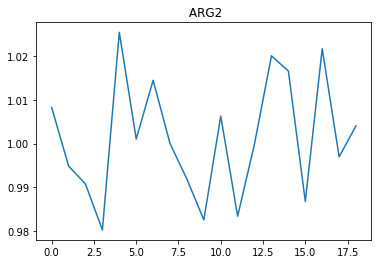

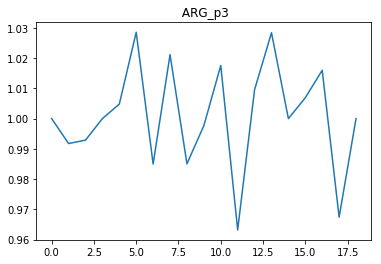

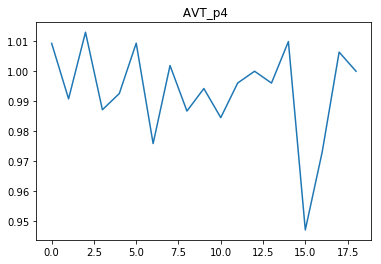

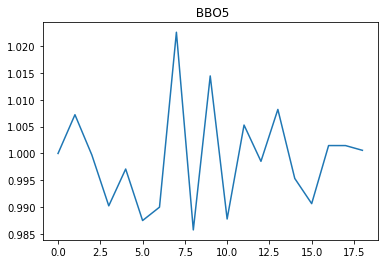

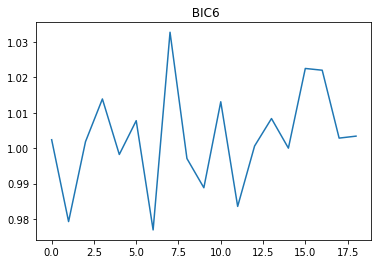

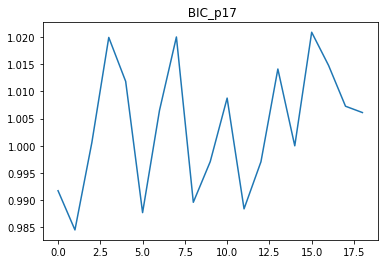

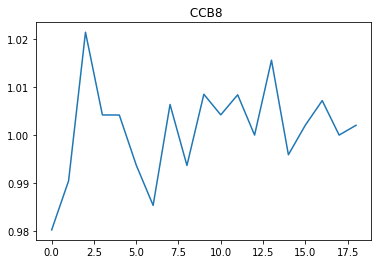

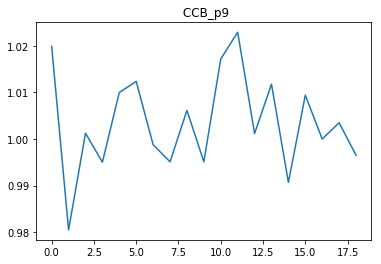

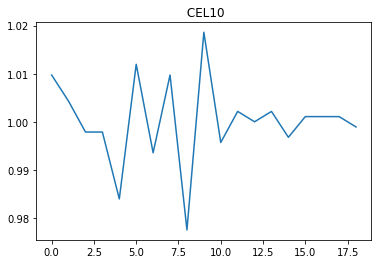

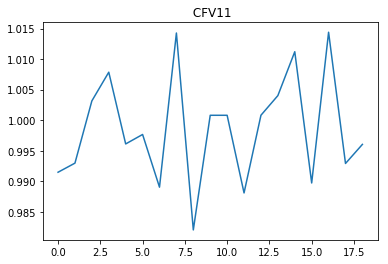

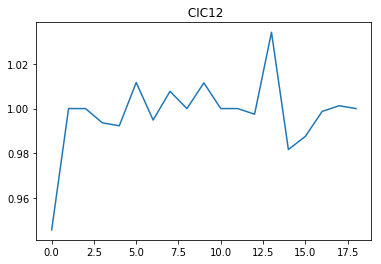

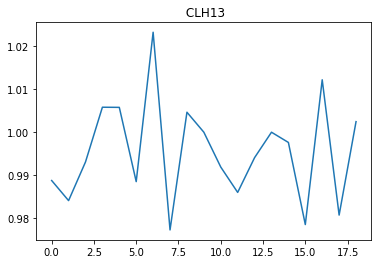

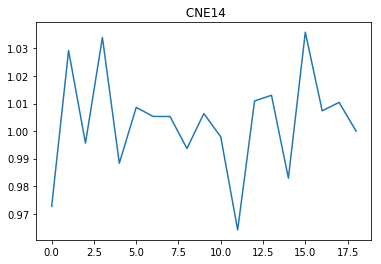

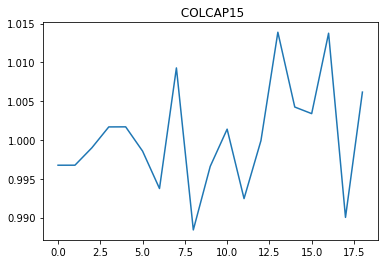

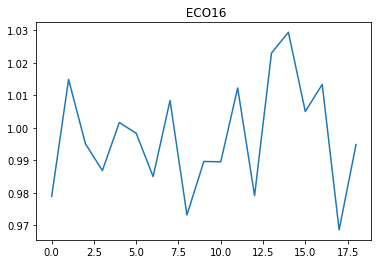

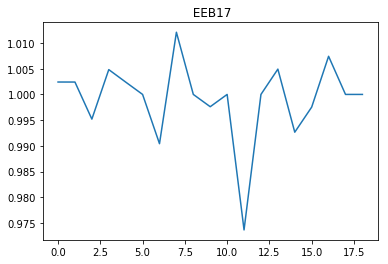

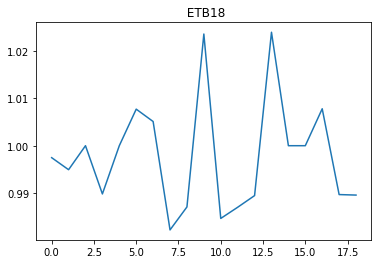

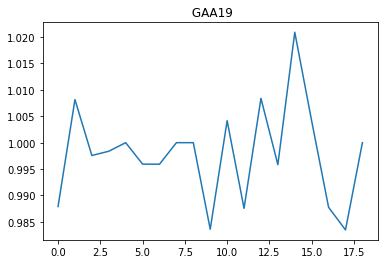

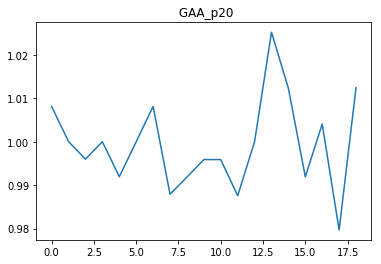

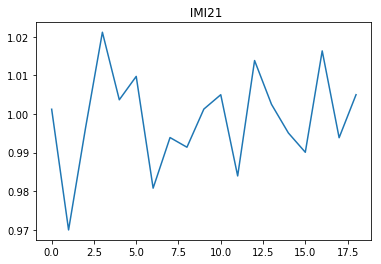

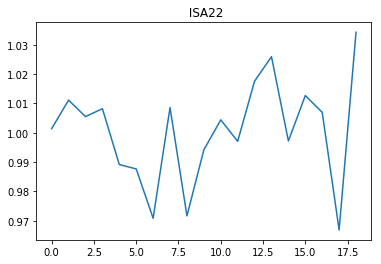

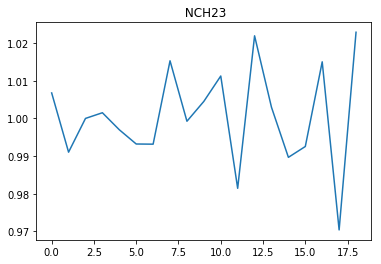

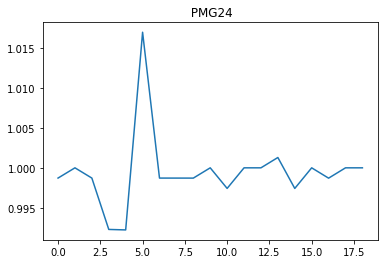

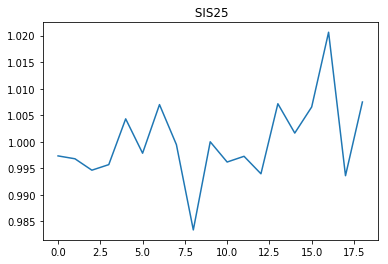

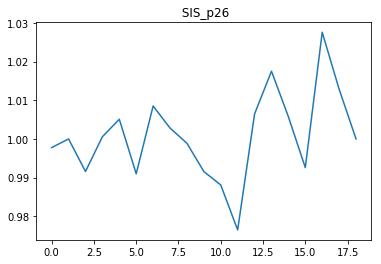

[[1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.         1.         1.
  1.        ]
 [1.01149425 1.00454545 1.00961538 1.         0.98823529 1.0085034
  0.98931984 1.00568182 1.00451977 0.99662542 0.99604966 1.00226629
  1.00565291 1.01180438 0.99555556 0.99609375 1.03641457 1.00216216
  1.0021575 ]
 [1.00823893 0.99489275 0.99075975 0.98031088 1.02536998 1.00103093
  1.01441813 1.         0.99187817 0.9825998  1.00625    0.98343685
  1.         1.02       1.01651187 0.98680203 1.02160494 0.99697885
  1.0040404 ]
 [1.         0.99176471 0.99288256 1.         1.00477897 1.02853746
  0.9849711  1.02112676 0.98505747 0.99766628 1.01754386 0.96321839
  1.00954654 1.02836879 1.         1.00689655 1.01598174 0.96741573
  1.        ]
 [1.00927644 0.99080882 1.01298701 0.98717949 0.99257885 1.00934579
  0.97592593 1.00189753 0.98674242 0.99424184 0.98455598 0.99607843
  1.         0.99

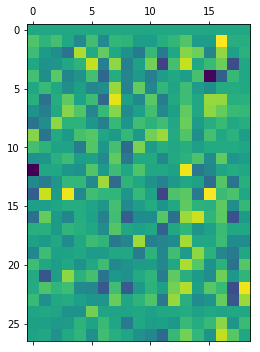

In [16]:
# Lectura y Obtención de archivos .csv
Path ='/media/anmrodriguezsa/DA4E639F4E6372E5/Users/Ángela/Desktop/Proyecto1/acciones'

allFiles = glob.glob(Path + "/*.csv")
Vt = []
list_ = []
flagFirst = 0
    
for file_ in allFiles:
    dataAccion = pd.read_csv(file_,index_col=None, header=0)  #Lectura de archivos .csv
    nf = str(file_)
    x  = dataAccion["Último"].values   #Selección de los valores del precio de cierre de las acciones
    x = [s. replace('.','') for s in x] 
    x = [s. replace(',','.') for s in x]
    v = [float(s) for s in x] 
   
    closingPrice = np.flipud(v)
    vt = closingPrice[1:] /closingPrice[0:-1] #Cálculo de vt (según artículo guía)
    
    if flagFirst==0:
        flagFirst = 1
        Vt = vt
    else:
        Vt = np.vstack((Vt,vt)) #"transpone"
        plt.plot(vt)
        plt.title(file_[95:-4] + str(len(Vt)))
        plt.show()

onesColumn = np.ones((1,Vt.shape[1]));
Vt = np.vstack((onesColumn,Vt)) # ubica elementos en la parte inferior - en este caso ubica filas-
print(Vt)

plt.matshow(Vt)   